## Импорты

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

## Загрузка данных

In [ ]:
url = 'https://www.kaggle.com/competitions/star-type-classification/overview'

od.download(url)

Skipping, found downloaded files in "./star-type-classification" (use force=True to force download)


In [ ]:
train_data = pd.read_csv('/content/star-type-classification/train_star.csv')
test_data = pd.read_csv('/content/star-type-classification/test_star.csv')

In [ ]:
train_data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625,Giant
1,10.86,3.26,2.12,1.840,M1V:,18.426088,Giant
2,8.83,7.57,1.05,0.461,F3V,18.225480,Giant
3,7.72,24.80,0.89,0.613,G3IV,19.692257,Giant
4,8.81,3.17,1.03,0.872,G6III,16.315296,Dwarf
...,...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,F8V,17.933014,Giant
20728,9.11,4.71,0.87,0.485,F5V,17.475105,Giant
20729,9.69,1.61,1.56,0.384,A2/A3IV,15.724129,Giant
20730,8.06,37.33,0.97,0.758,K1V,20.920290,Giant


## Раведывательный анализ данных

In [ ]:
df = train_data.copy()

In [ ]:
print(f'DataFrame содержит в себе {df.shape[0]} строк и {df.shape[1]} столбцов')

DataFrame содержит в себе 20732 строк и 7 столбцов


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20732 entries, 0 to 20731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         20732 non-null  float64
 1   Plx          20732 non-null  float64
 2   e_Plx        20732 non-null  float64
 3   B-V          20732 non-null  float64
 4   SpType       20732 non-null  object 
 5   Amag         20732 non-null  float64
 6   TargetClass  20732 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
SpType,0
Amag,0
TargetClass,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag
count,20732.000000,20732.000000,20732.000000,20732.000000,20732.000000
mean,8.045100,8.774717,1.157515,0.584712,16.671187
std,1.299999,15.186434,0.888745,0.457422,2.407249
min,-0.010000,-27.840000,0.420000,-0.400000,-0.350000
25%,7.370000,3.020000,0.820000,0.227000,15.284584
50%,8.280000,5.680000,1.010000,0.526000,16.706049
75%,8.930000,10.170000,1.280000,0.923000,18.282476
max,12.560000,772.330000,40.630000,3.315000,30.449015


In [ ]:
df.describe(include=['object'])

,SpType,TargetClass
count,20732,20732
unique,1681,2
top,F5V,Giant
freq,753,15793


In [ ]:
df['TargetClass'].value_counts()

,count
TargetClass,
Giant,15793
Dwarf,4939


<ipython-input-14-a79a7b10f599>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['TargetClass'].value_counts(),  palette='hls')


<Axes: xlabel='TargetClass', ylabel='count'>

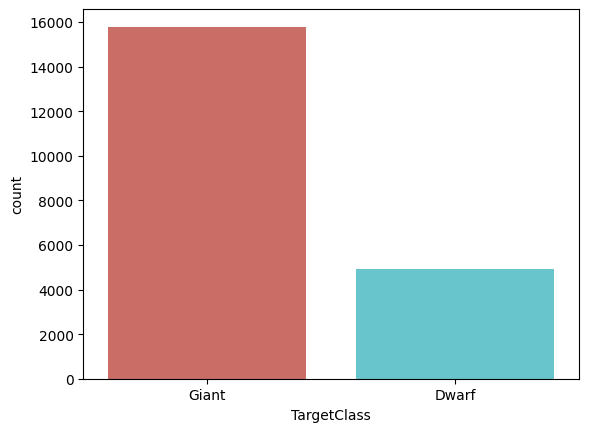

In [ ]:
sns.barplot(df['TargetClass'].value_counts(),  palette='hls')

## Преобразование данных

### Стандартизация данных

In [ ]:
# Выделим столбцы, где присутствуют числовые значения
# Масштабирование числовых признаков
scaler = StandardScaler()
numeric_features = ["Vmag", "Plx", "e_Plx", "B-V", "Amag"]
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,1.496114,-0.056283,0.509140,0.133989,G5/G6V,1.168348,Giant
1,2.165361,-0.363143,1.082997,2.744332,M1V:,0.729024,Giant
2,0.603784,-0.079330,-0.120977,-0.270461,F3V,0.645687,Giant
3,-0.250083,1.055262,-0.301010,0.061844,G3IV,1.255019,Giant
4,0.588399,-0.369070,-0.143481,0.628074,G6III,-0.147845,Dwarf


### SpType

In [ ]:
# Извлекаем основной спектральный класс
df["SpType"] = df["SpType"].str.extract(r'([OBAFGKM])')

# Кодируем спектральный класс one-hot encoding
df = pd.get_dummies(df, columns=["SpType"], drop_first=True)

### TargetClass

In [ ]:
# Добавляем LabelEncoder, чтобы закодировать целевую переменную
encoder_TargetClass = LabelEncoder()

df['TargetClass'] = encoder_TargetClass.fit_transform(df['TargetClass'])

df.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,SpType_B,SpType_F,SpType_G,SpType_K,SpType_M,SpType_O
0,1.496114,-0.056283,0.509140,0.133989,1.168348,1,False,False,True,False,False,False
1,2.165361,-0.363143,1.082997,2.744332,0.729024,1,False,False,False,False,True,False
2,0.603784,-0.079330,-0.120977,-0.270461,0.645687,1,False,True,False,False,False,False
3,-0.250083,1.055262,-0.301010,0.061844,1.255019,1,False,False,True,False,False,False
4,0.588399,-0.369070,-0.143481,0.628074,-0.147845,0,False,False,True,False,False,False


## Логистическая модель

### Подготовка к обучению модели

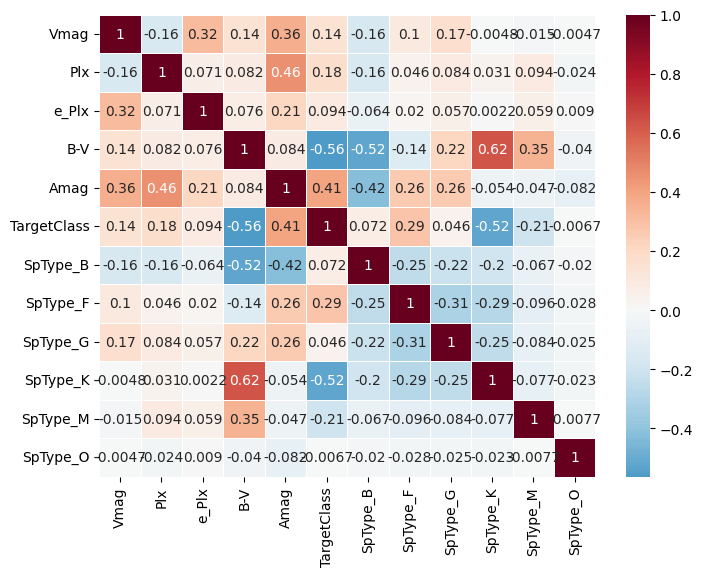

In [ ]:
# Строим корреляционную матрицу факторов + целевой признак.
corr_matrix = df.corr()

# рисуем тепловую карту
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True, center=0, linewidths=0.5);

### Обучение модели

In [ ]:
# Выделим вектор признаков Х и вектор ответов y
# Разделение данных
df = df.dropna()

X = df.drop(columns=["TargetClass"])
y = df["TargetClass"]

# train - на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression(class_weight="balanced", random_state=42)

model.fit(X_train, y_train)

answers_pred = model.predict(X_test)

In [ ]:
# Создаем DataFrame с коэффициентами
coefficients = pd.DataFrame({
    'Feature': df.drop(['TargetClass'], axis=1).columns,
    'Coefficient': model.coef_.flatten()
})

coefficients

,Feature,Coefficient
0,Vmag,0.591504
1,Plx,2.101488
2,e_Plx,0.149629
3,B-V,-1.608215
4,Amag,0.557778
5,SpType_B,-0.967166
6,SpType_F,0.669752
7,SpType_G,0.017050
8,SpType_K,-1.251826
9,SpType_M,-1.296076


In [ ]:
model.intercept_

array([1.20709749])

In [ ]:
confusion_matrix(y_test, answers_pred)

array([[ 859,  129],
       [ 302, 2857]])

In [ ]:
f1_score(y_test, answers_pred)

0.9298616761594792

### Предсказание для test

In [ ]:
df_t = test_data.copy()
df_t.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,7.91,6.33,1.01,0.843,G5III,16.917019
1,7.35,1.30,0.53,1.304,K1/K2III,12.919716
2,6.75,8.01,0.84,1.019,K1III,16.268162
3,4.47,7.03,0.72,1.283,K4III,13.704777
4,7.33,2.45,1.14,1.600,K5III,14.275830


In [ ]:
# Преобразование данных
## Стандартизация данных
numeric_features = ["Vmag", "Plx", "e_Plx", "B-V", "Amag"]
df_t[numeric_features] = scaler.transform(df_t[numeric_features])

# SpType encoder
df_t["SpType"] = df_t["SpType"].str.extract(r'([OBAFGKM])')
# Кодируем спектральный класс one-hot encoding
df_t = pd.get_dummies(df_t, columns=["SpType"], drop_first=True)

df_t = df_t.dropna()

In [ ]:
df_t

,Vmag,Plx,e_Plx,B-V,Amag,SpType_B,SpType_F,SpType_G,SpType_K,SpType_M,SpType_O
0,-0.103926,-0.160984,-0.165985,0.564674,0.102124,False,False,True,False,False,False
1,-0.534706,-0.492209,-0.706085,1.572520,-1.558443,False,False,False,True,False,False
2,-0.996256,-0.050356,-0.357271,0.949448,-0.167425,False,False,False,True,False,False
3,-2.750145,-0.114889,-0.492296,1.526609,-1.232312,False,False,False,True,False,False
4,-0.550091,-0.416482,-0.019708,2.219640,-0.995084,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
18815,-0.250083,-0.419116,-0.120977,1.972598,-0.847918,False,False,False,True,False,False
18816,0.173004,-0.447431,-0.391027,0.918841,-0.796721,False,False,False,True,False,False
18817,0.373009,-0.502745,-0.301010,-1.481625,-1.186720,True,False,False,False,False,False
18818,0.803789,-0.155716,-0.064716,-0.228923,0.603651,False,True,False,False,False,False


In [ ]:
df_t['TargetClass'] = model.predict(df_t)

In [ ]:
submition = pd.DataFrame(df_t, columns=['TargetClass'])
submition = submition.reset_index()
submition

,index,TargetClass
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
18815,18815,0
18816,18816,0
18817,18817,1
18818,18818,1


In [ ]:
submition.to_csv('my_submit_v4.csv', index=False)